# 사람의 성별을 구분하는 CNN

Ayyadevera(2019)를 기반

남자 1000개, 여자 1000개 총 200개의 남녀 사진 

In [1]:
import pandas as pd 
from skimage import io
data=pd.read_csv('C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 6장 CNN의 응용과 이전학습/a943287.csv')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [2]:
data.shape

(64084, 10)

In [4]:
data_male=data[data['please_select_the_gender_of_the_person_in_the_picture']=='male']
data_female=data[data['please_select_the_gender_of_the_person_in_the_picture']=='female']
final_data=pd.concat([data_male[:1000],data_female[:1000]], axis=0).reset_index(drop=True)
final_data.shape

(2000, 10)

In [5]:
final_data.shape[0]

2000

## URL 형태의 이미지 불러오기

In [6]:
x=[] # 이미지
y=[] # 남녀 라벨
for i in range(final_data.shape[0]):
    try:
        image=io.imread(final_data.loc[i]['image_url']) # URL로 연결된 이미지 자료 읽기
        if (image.shape==(300,300,3)):
            x.append(image)
            y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
    except:
        continue

In [7]:
print(x[1])
print(y[1])

[[[190 185 182]
  [188 183 180]
  [189 184 181]
  ...
  [211 210 206]
  [212 208 205]
  [212 208 205]]

 [[190 185 182]
  [190 185 182]
  [191 186 183]
  ...
  [210 209 205]
  [212 208 205]
  [212 208 205]]

 [[189 184 181]
  [191 186 183]
  [193 188 185]
  ...
  [210 209 205]
  [213 209 206]
  [213 209 206]]

 ...

 [[195 191 188]
  [196 192 189]
  [197 193 190]
  ...
  [162 159 154]
  [174 171 166]
  [185 182 177]]

 [[194 190 187]
  [196 192 189]
  [196 192 189]
  ...
  [157 154 149]
  [168 165 160]
  [179 176 171]]

 [[195 191 188]
  [194 193 189]
  [194 193 189]
  ...
  [154 151 146]
  [164 161 156]
  [175 172 167]]]
male


## (50, 50, 3) 크기의 자료로 변환 

In [7]:
# !pip install opencv-python

     ---------------------------------------- 35.4/35.4 MB 9.9 MB/s eta 0:00:00


In [8]:
import cv2
import numpy as np
x2=[]
y2=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(50,50))
    x2.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y2.append(img_label)

In [ ]:
## 컬러자료를 흑백으로 변환하고 싶은 경우
import cv2
import numpy as np
x2=[]
y2=[]
for i in range(len(x)):
    img=cv2.cvtColor(x[i],cv2.COLOR_BRG2GRY)
    img2=cv2.resize(img,(50,50))
    x2.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y2.append(img_label)

## 텐서형태로 자료 변환

In [9]:
x2=np.array(x2) # list를 array(텐서)로 바꾸기
print(x2.shape)
y1=np.array(y2)
x1=x2.astype('float32')/255.

(1722, 50, 50, 3)


## Train Test로 나누기

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.1,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1549, 50, 50, 3) (173, 50, 50, 3) (1549,) (173,)


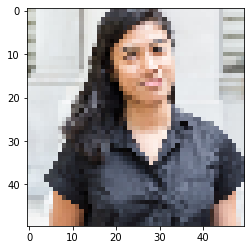

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
plt.show()

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[50,50,3])) # 채널, 커널사이즈, 활성화함수, 입력사이즈
model.add(MaxPooling2D((2,2)))                                      # Pooling
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))        # 채널, 커널사이즈, 활성화함수, 패딩
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc']) # 이진분류
result=model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print(score)

Epoch 1/30
49/49 [==============================] - 10s 190ms/step - loss: 0.6941 - acc: 0.5416 - val_loss: 0.6513 - val_acc: 0.6590
Epoch 2/30
49/49 [==============================] - 8s 166ms/step - loss: 0.6448 - acc: 0.6411 - val_loss: 0.6105 - val_acc: 0.6821
Epoch 3/30
49/49 [==============================] - 8s 173ms/step - loss: 0.5916 - acc: 0.6934 - val_loss: 0.5491 - val_acc: 0.7341
Epoch 4/30
49/49 [==============================] - 9s 174ms/step - loss: 0.5412 - acc: 0.7340 - val_loss: 0.5712 - val_acc: 0.7110
Epoch 5/30
49/49 [==============================] - 8s 170ms/step - loss: 0.4894 - acc: 0.7637 - val_loss: 0.5079 - val_acc: 0.7514
Epoch 6/30
49/49 [==============================] - 8s 170ms/step - loss: 0.4228 - acc: 0.7895 - val_loss: 0.5308 - val_acc: 0.7283
Epoch 7/30
49/49 [==============================] - 8s 173ms/step - loss: 0.3769 - acc: 0.8179 - val_loss: 0.4663 - val_acc: 0.7746
Epoch 8/30
49/49 [==============================] - 10s 209ms/step - loss: 

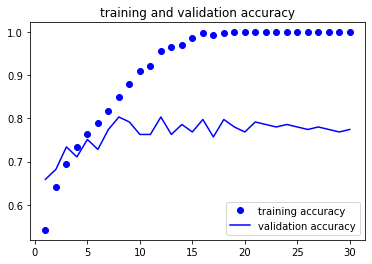

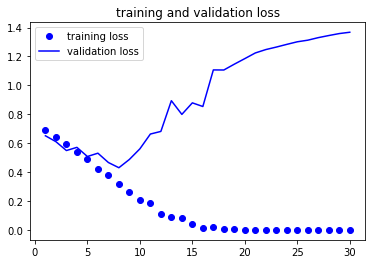

In [14]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

## (300, 300, 3) 일때

In [15]:
import cv2
import numpy as np
x4=[]
y4=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(300,300))
    x4.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y4.append(img_label)
x4=np.array(x4)
print(x4.shape)
y3=np.array(y4)
x3=x4.astype('float32')/255.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.1,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1722, 300, 300, 3)
(1549, 300, 300, 3) (173, 300, 300, 3) (1549,) (173,)


In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[300,300,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
result=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print(score)

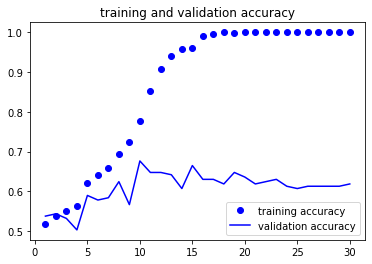

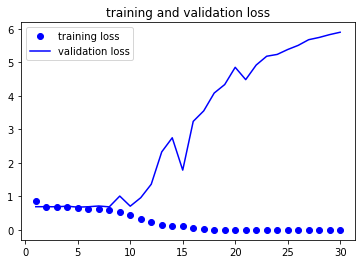

In [12]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# 이전학습 VGG16

In [17]:
from tensorflow.keras.applications import VGG16
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3)) # 추정된 모수 사용, FC 층을 제외하고
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,MaxPooling2D
from tensorflow.keras import optimizers

vgg_base=VGG16(weights='imagenet',include_top=False, input_shape=(300,300,3))  

for layer in vgg_base.layers:
    layer.trainable=False
  
last_layer=vgg_base.get_layer('block5_pool')
last_output=last_layer.output

x=MaxPooling2D((3,3))(last_output)
x=Flatten()(x)
x=Dense(64, activation='relu',name='FC_2')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(1, activation='sigmoid',name='output')(x)

vgg_model=Model(inputs=vgg_base.input, outputs=x)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [20]:
vgg_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['accuracy']) # 옵티마이져 조정
history_vgg16=vgg_model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
49/49 [==============================] - 437s 9s/step - loss: 0.4946 - accuracy: 0.7530 - val_loss: 0.4433 - val_accuracy: 0.8035
Epoch 2/10
49/49 [==============================] - 470s 10s/step - loss: 0.4971 - accuracy: 0.7509 - val_loss: 0.4359 - val_accuracy: 0.8035
Epoch 3/10
49/49 [==============================] - 471s 10s/step - loss: 0.4824 - accuracy: 0.7525 - val_loss: 0.4270 - val_accuracy: 0.8208
Epoch 4/10
49/49 [==============================] - 428s 9s/step - loss: 0.4387 - accuracy: 0.7841 - val_loss: 0.4159 - val_accuracy: 0.8324
Epoch 5/10
49/49 [==============================] - 430s 9s/step - loss: 0.4155 - accuracy: 0.8018 - val_loss: 0.4117 - val_accuracy: 0.8208
Epoch 6/10
49/49 [==============================] - 454s 9s/step - loss: 0.4395 - accuracy: 0.7913 - val_loss: 0.4043 - val_accuracy: 0.8208
Epoch 7/10
49/49 [==============================] - 433s 9s/step - loss: 0.4094 - accuracy: 0.8046 - val_loss: 0.3968 - val_accuracy: 0.8266
Epoch 8/10


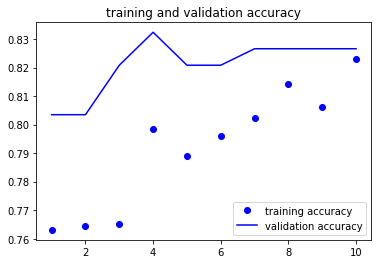

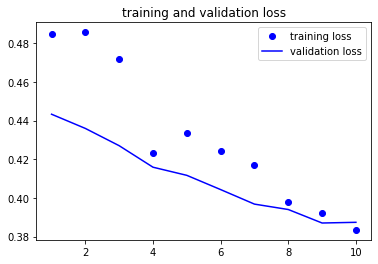

In [21]:
import matplotlib.pyplot as plt
acc=history_vgg16.history['accuracy']
val_acc=history_vgg16.history['val_accuracy']
loss=history_vgg16.history['loss']
val_loss=history_vgg16.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()